In [1]:
import sys
sys.path.append("..")

import scipy.io as sio
from sklearn.preprocessing import StandardScaler
from troubleshooter.anomaly.objects.svdd import SVDD
from troubleshooter.anomaly.plotting.svdd import Visualization as draw

In [2]:
# kernel list
kernelList = {"1": {"type": 'gauss', "width": 1/24},
              "2": {"type": 'linear', "offset": 0},
              "3": {"type": 'ploy', "degree": 2, "offset": 0},
              "4": {"type": 'tanh', "gamma": 1e-4, "offset": 0},
              "5": {"type": 'lapl', "width": 1/12}
              }

## Load data

In [3]:
data = sio.loadmat("../data/banana.mat")

# 归一化后效果不好！
# train_data = StandardScaler().fit_transform(data['trainData']) # training data 
#test_data = StandardScaler().fit_transform(data['testData'])# test data
train_data = data["trainData"]
test_data = data["testData"]

train_label = data['trainLabel'] # training data 
test_label = data['testLabel'] # testng data
display(train_data[:10])
display(train_label[:10])


array([[ 3.73699414,  1.6757189 ],
       [-4.3166318 , -2.01802944],
       [ 4.78837203,  0.06399416],
       [ 5.40624754,  0.92680023],
       [-2.78281914, -5.0356995 ],
       [ 3.50346655,  3.33692926],
       [ 4.14329294,  2.51023244],
       [ 2.35802371,  3.9735461 ],
       [ 4.85029865, -0.76071463],
       [ 3.67045557, -2.58083231]])

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=int16)

In [4]:
# set SVDD parameters
parameters = {"positive penalty": 0.9,
                "negative penalty": 0.8,
                "kernel": kernelList.get(str(0+1)),
                "option": {"display": 'on'}}

# construct an SVDD model
svdd = SVDD(parameters)

# train SVDD model
svdd.train(train_data, train_label)

# test SVDD model
distance, accuracy = svdd.test(test_data, test_label)



*** SVDD model training finished ***

iter             = 13
time cost        = 0.0447 s
obj              = -0.7767
pData            = 87.5000 %
nData            = 12.5000 %
nSVs             = 13
radio of nSVs    = 6.5000 %
accuracy         = 97.5000 %




*** SVDD model test finished ***

time cost        = 0.0074 s
accuracy         = 96.6667 %




In [5]:
len(distance)

300

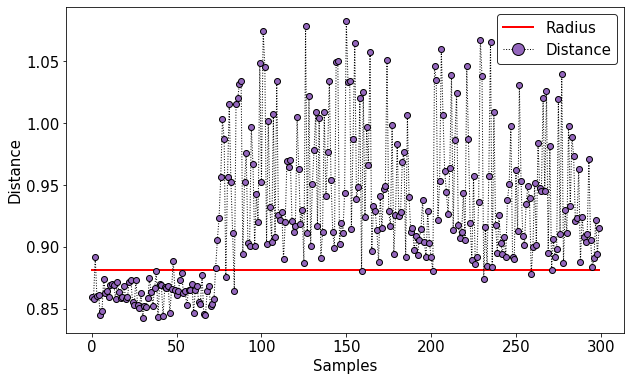

In [6]:
# visualize the results
draw.test_result(svdd, distance)

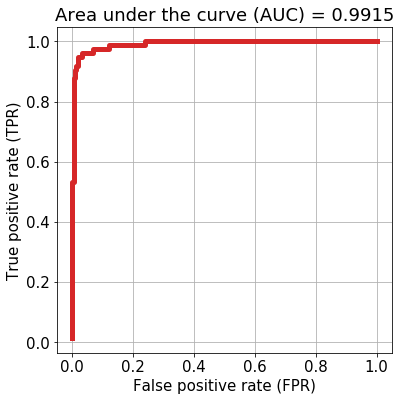

In [7]:
draw.test_ROC(test_label, distance)

Calculating the grid (0100*0100) scores...

Grid scores completed. Time cost 4.1831 s



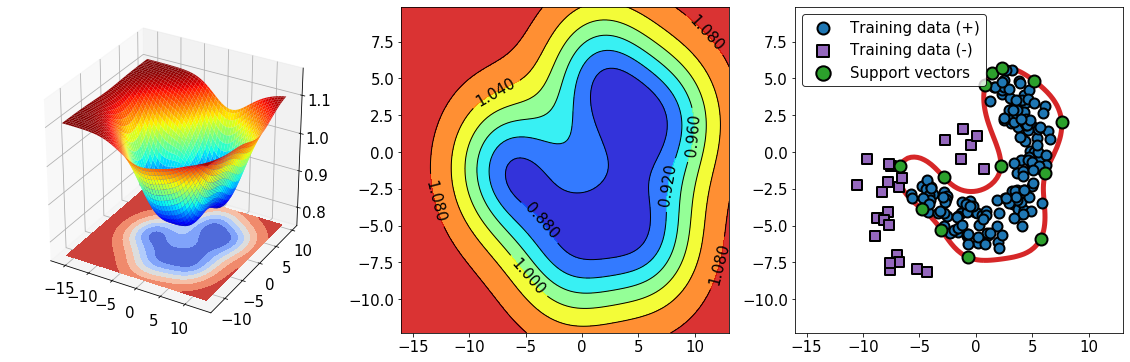

In [8]:
draw.boundary(svdd, train_data, train_label)